<a href="https://colab.research.google.com/github/gustavo-duarte-silva/ML-wine-type/blob/main/Wine_Red_White.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando o Dataset
df = pd.read_csv("/content/drive/MyDrive/CIENTISTA DE DADOS/PROJETOS/RED WINE QUALITY/wine_dataset.csv")
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


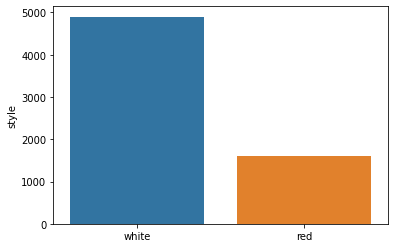

In [8]:
#A Variavel Target esta desbalanceada, assim a Acuracia será muito alta
sns.barplot(data=df, x=df['style'].value_counts().index, y=df['style'].value_counts())

In [9]:
#Criando uma Nova Coluna com a variavel Target em binario
df['style_bin'] = df['style'].replace('red', 1)
df['style_bin'] = df['style_bin'].replace('white', 0)
df.drop(columns='style', inplace=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [10]:
#verificando valores nulos
df.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
style_bin               False
dtype: bool

In [11]:
#Removido a Coluna Quality pois é um data leakage
X = df.drop(columns=['quality', 'style_bin'])
y = df.iloc[:,-1]

In [12]:
#Carregando a biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=47)

In [13]:
#Escolhendo o ExtraTreesClassifier como Algoritmo do modelo
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
modelo = ExtraTreesClassifier()
modelo.fit(x_train, y_train)

ExtraTreesClassifier()

In [15]:
resultado = modelo.score(x_test, y_test)
print("Acuracia: ", resultado)

Acuracia:  0.9953846153846154


In [16]:
x_test[405:410]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
5828,6.3,0.26,0.25,5.2,0.046,11.0,133.0,0.99202,2.97,0.68,11.0
607,8.8,0.48,0.41,3.3,0.092,26.0,52.0,0.99820,3.31,0.53,10.5
2701,6.3,0.16,0.40,1.6,0.033,59.0,148.0,0.99140,3.44,0.53,11.4
321,9.3,0.61,0.26,3.4,0.090,25.0,87.0,0.99975,3.24,0.62,9.7
1464,6.8,0.59,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7


In [17]:
y_test[405:410]

5828    0
607     1
2701    0
321     1
1464    1
Name: style_bin, dtype: int64

In [18]:
modelo.predict(x_test[405:410])

array([0, 1, 0, 1, 1])

In [27]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [23]:
confusion_matrix(y_true=y_train, y_pred=modelo.predict(x_train))

array([[3443,    0],
       [   2, 1102]])

In [24]:
precision_score(y_true=y_train, y_pred=modelo.predict(x_train))

1.0

In [25]:
recall_score(y_true=y_train, y_pred=modelo.predict(x_train))

0.9981884057971014

In [28]:
f1_score(y_true=y_train, y_pred=modelo.predict(x_train))

0.99909338168631

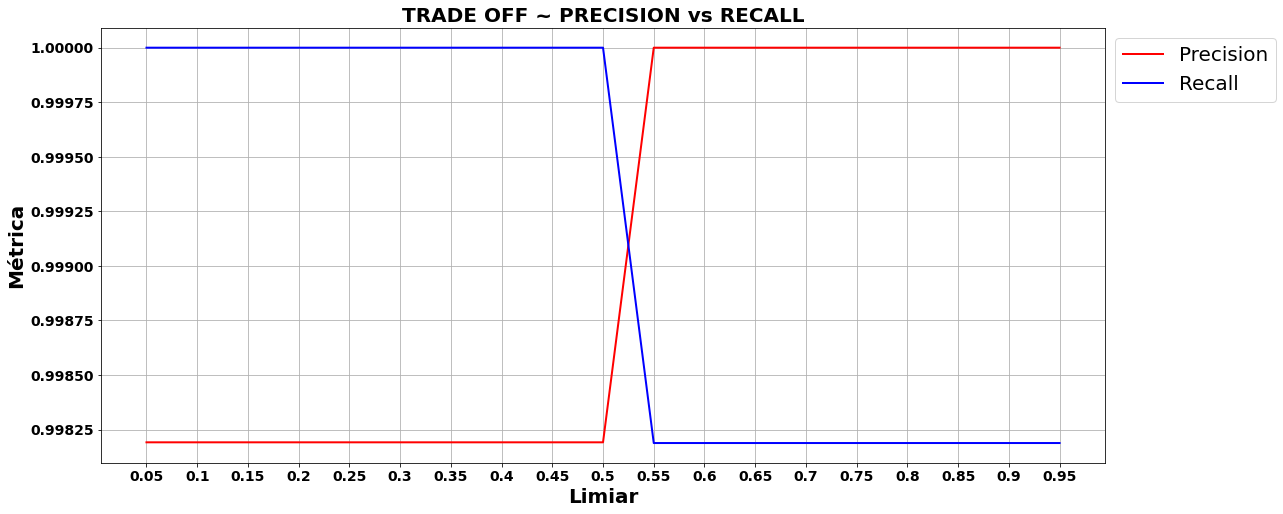

In [32]:
#verificar o melhor limiar entre a recall e precision
prob_class = modelo.predict_proba(x_train)[:,1]
precision_list = []
recall_list = []
limiares = np.linspace(0.05, 0.95, 19)
for t in limiares:
  pred_t = np.where(prob_class > t, 1, 0)
  precision_t = precision_score(y_true=y_train, y_pred=pred_t)
  recall_t = recall_score(y_true=y_train, y_pred=pred_t)

  precision_list.append(precision_t)
  recall_list.append(recall_t)

plt.figure(figsize=[18,8])
plt.plot(range(len(limiares)), precision_list, c = 'red', label = 'Precision', lw = 2)
plt.plot(range(len(limiares)), recall_list, c = 'blue', label = 'Recall', lw = 2)
plt.xticks(range(len(limiares)), limiares.round(2), fontweight = 'bold', fontsize = 14)
plt.yticks(fontweight = 'bold', fontsize = 14)
plt.legend(fontsize = 20, bbox_to_anchor = [1,1])
plt.grid()
plt.xlabel("Limiar", fontsize = 20, fontweight = 'bold')
plt.ylabel("Métrica", fontsize = 20, fontweight = 'bold')
plt.title("TRADE OFF ~ PRECISION vs RECALL", fontsize = 20, fontweight = 'bold')
plt.show()

#Exportando o Modelo para Produção - Streamlit
import pickle
- pickle_out = open('/content/drive/MyDrive/CIENTISTA DE DADOS/PROJETOS/RED WINE QUALITY/modelo.pkl','wb')
- pickle.dump(modelo, pickle_out)
- pickle_out.close()